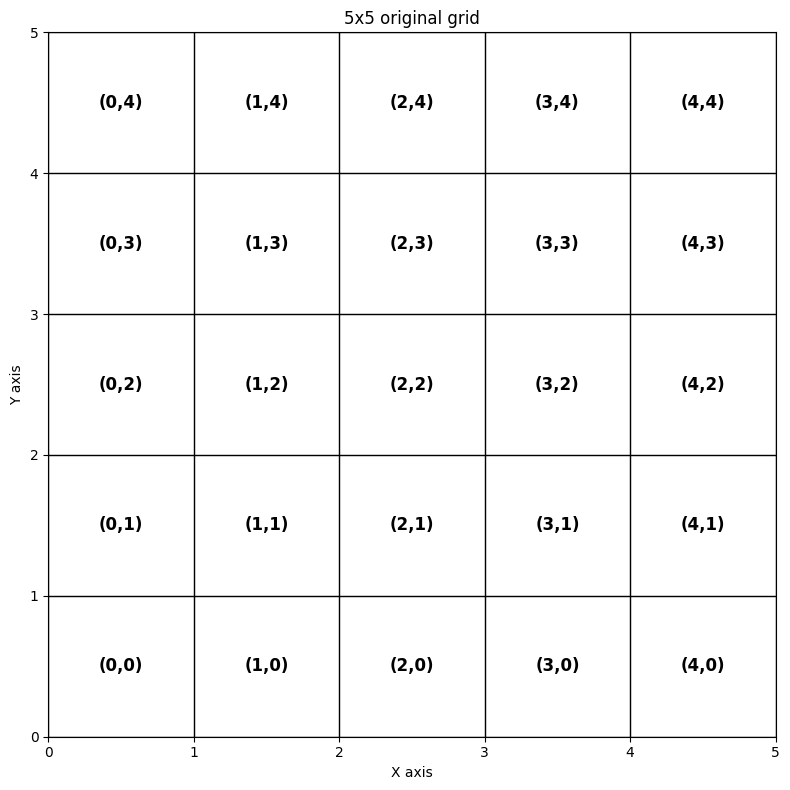

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 創建5x5的正方形網格
size = 5
fig, ax = plt.subplots(figsize=(8, 8))

# 繪製網格線
for i in range(size + 1):
    ax.axhline(i, color="black", linewidth=1)
    ax.axvline(i, color="black", linewidth=1)

# 在每個格子中標記座標
for i in range(size):
    for j in range(size):
        # 座標標記在格子中心
        ax.text(j + 0.5, i + 0.5, f"({j},{i})", 
                ha="center", va="center", fontsize=12, fontweight="bold")

# 設置軸的範圍和標籤
ax.set_xlim(0, size)
ax.set_ylim(0, size)
ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
ax.set_title("5x5 original grid")
# 設置刻度
ax.set_xticks(range(size + 1))
ax.set_yticks(range(size + 1))

plt.grid(True)
plt.tight_layout()
plt.show()

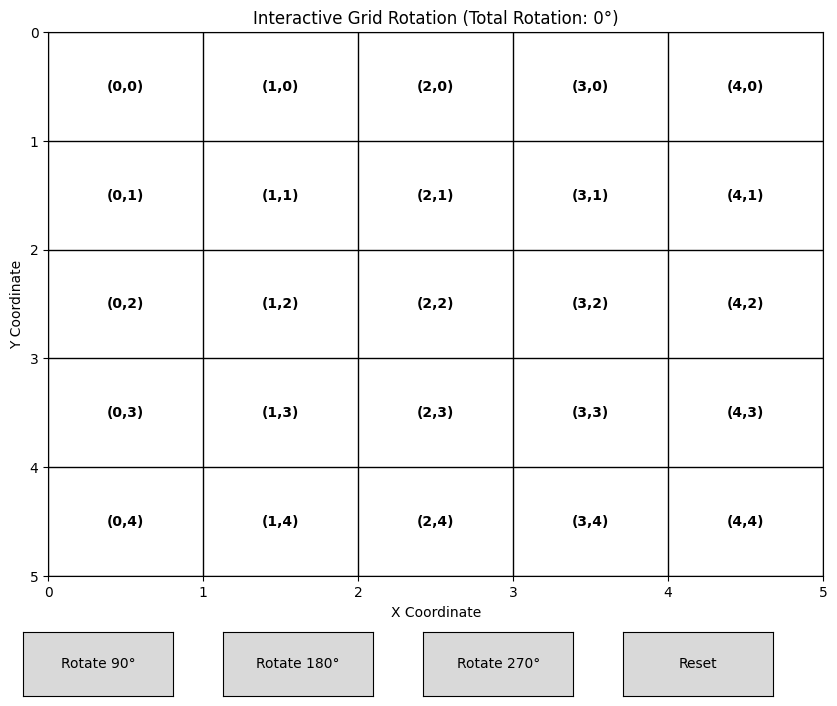

In [2]:
# Interactive Grid Rotation GUI
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Button
import matplotlib.patches as patches

class InteractiveGrid:
    def __init__(self, size=5):
        self.size = size
        self.current_rotation = 0
        
        # Initialize coordinate matrix
        self.reset_grid()
        
        # Create figure and axes
        self.fig, self.ax = plt.subplots(figsize=(10, 8))
        self.fig.subplots_adjust(bottom=0.2)
        
        # Create buttons
        self.create_buttons()
        
        # Initialize display
        self.update_display()
        
    def reset_grid(self):
        """Reset to original grid"""
        self.grid_coords = np.zeros((self.size, self.size, 2), dtype=int)
        for i in range(self.size):
            for j in range(self.size):
                self.grid_coords[i, j] = [j, i]  # [x, y]
    
    def create_buttons(self):
        """Create control buttons"""
        # Button positions
        ax_btn90 = plt.axes([0.1, 0.05, 0.15, 0.08])
        ax_btn180 = plt.axes([0.3, 0.05, 0.15, 0.08])
        ax_btn270 = plt.axes([0.5, 0.05, 0.15, 0.08])
        ax_reset = plt.axes([0.7, 0.05, 0.15, 0.08])
        
        # Create buttons
        self.btn_90 = Button(ax_btn90, 'Rotate 90°')
        self.btn_180 = Button(ax_btn180, 'Rotate 180°')
        self.btn_270 = Button(ax_btn270, 'Rotate 270°')
        self.btn_reset = Button(ax_reset, 'Reset')
        
        # Bind events
        self.btn_90.on_clicked(self.rotate_90)
        self.btn_180.on_clicked(self.rotate_180)
        self.btn_270.on_clicked(self.rotate_270)
        self.btn_reset.on_clicked(self.reset)
    
    def rotate_grid(self, angle):
        """Rotate grid"""
        new_coords = np.zeros_like(self.grid_coords)
        
        for i in range(self.size):
            for j in range(self.size):
                orig_x, orig_y = self.grid_coords[i, j]
                
                if angle == 90:
                    # Clockwise 90°: (x,y) -> (y, size-1-x)
                    new_x, new_y = orig_y, self.size - 1 - orig_x
                elif angle == 180:
                    # 180°: (x,y) -> (size-1-x, size-1-y)
                    new_x, new_y = self.size - 1 - orig_x, self.size - 1 - orig_y
                elif angle == 270:
                    # Clockwise 270°: (x,y) -> (size-1-y, x)
                    new_x, new_y = self.size - 1 - orig_y, orig_x
                
                new_coords[i, j] = [new_x, new_y]
        
        self.grid_coords = new_coords
        self.current_rotation = (self.current_rotation + angle) % 360
    
    def update_display(self):
        """Update display"""
        self.ax.clear()
        
        # Draw grid lines
        for i in range(self.size + 1):
            self.ax.axhline(i, color='black', linewidth=1)
            self.ax.axvline(i, color='black', linewidth=1)
        
        # Display coordinates
        for i in range(self.size):
            for j in range(self.size):
                orig_x, orig_y = self.grid_coords[i, j]
                
                # Display original coordinates at current position (j, i)
                display_text = f"({orig_x},{orig_y})"
                self.ax.text(j + 0.5, i + 0.5, display_text,
                           ha='center', va='center', fontsize=10, fontweight='bold')
        
        # Set axis properties
        self.ax.set_xlim(0, self.size)
        self.ax.set_ylim(0, self.size)
        self.ax.set_xlabel('X Coordinate')
        self.ax.set_ylabel('Y Coordinate')
        self.ax.set_title(f'Interactive Grid Rotation (Total Rotation: {self.current_rotation}°)')
        self.ax.invert_yaxis()
        self.ax.set_xticks(range(self.size + 1))
        self.ax.set_yticks(range(self.size + 1))
        
        plt.draw()
    
    def rotate_90(self, event):
        """Rotate 90 degrees"""
        self.rotate_grid(90)
        self.update_display()
    
    def rotate_180(self, event):
        """Rotate 180 degrees"""
        self.rotate_grid(180)
        self.update_display()
    
    def rotate_270(self, event):
        """Rotate 270 degrees"""
        self.rotate_grid(270)
        self.update_display()
    
    def reset(self, event):
        """Reset grid"""
        self.current_rotation = 0
        self.reset_grid()
        self.update_display()

# Create interactive grid
interactive_grid = InteractiveGrid(5)
plt.show()

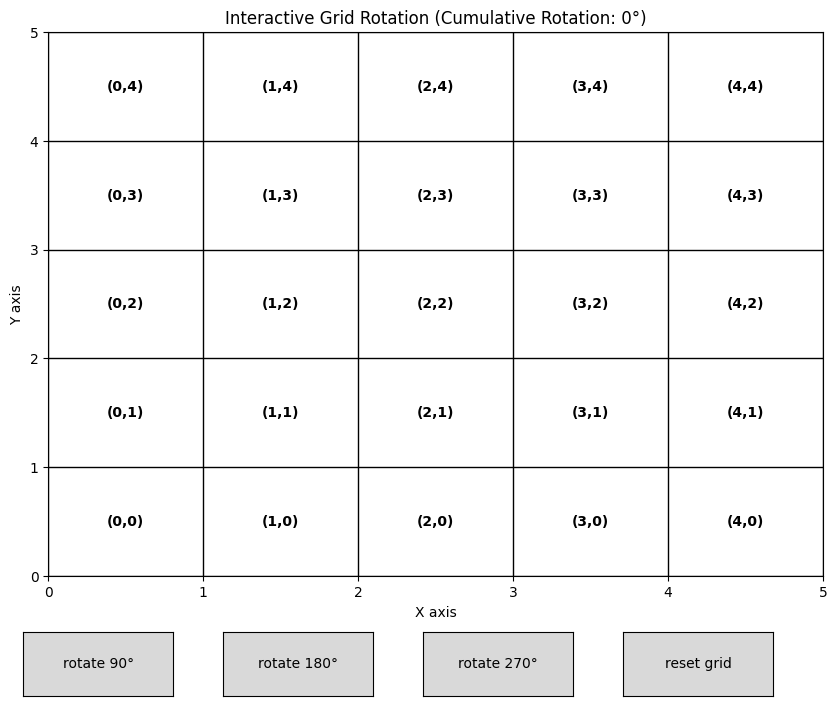

In [3]:
# 互動式旋轉網格 GUI
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Button
import matplotlib.patches as patches

class InteractiveGrid:
    def __init__(self, size=5):
        self.size = size
        self.current_rotation = 0
        
        # 初始化座標矩陣
        self.reset_grid()
        
        # 創建圖形和軸
        self.fig, self.ax = plt.subplots(figsize=(10, 8))
        self.fig.subplots_adjust(bottom=0.2)
        
        # 創建按鈕
        self.create_buttons()
        
        # 初始化顯示
        self.update_display()
        
    def reset_grid(self):
        """重置為原始網格"""
        self.grid_coords = np.zeros((self.size, self.size, 2), dtype=int)
        for i in range(self.size):
            for j in range(self.size):
                self.grid_coords[i, j] = [j, i]  # [x, y]
    
    def create_buttons(self):
        """創建控制按鈕"""
        # 按鈕位置
        ax_btn90 = plt.axes([0.1, 0.05, 0.15, 0.08])
        ax_btn180 = plt.axes([0.3, 0.05, 0.15, 0.08])
        ax_btn270 = plt.axes([0.5, 0.05, 0.15, 0.08])
        ax_reset = plt.axes([0.7, 0.05, 0.15, 0.08])
        
        # 創建按鈕
        self.btn_90 = Button(ax_btn90, 'rotate 90°')
        self.btn_180 = Button(ax_btn180, 'rotate 180°')
        self.btn_270 = Button(ax_btn270, 'rotate 270°')
        self.btn_reset = Button(ax_reset, 'reset grid')
        
        # 綁定事件
        self.btn_90.on_clicked(self.rotate_90)
        self.btn_180.on_clicked(self.rotate_180)
        self.btn_270.on_clicked(self.rotate_270)
        self.btn_reset.on_clicked(self.reset)
    
    def rotate_grid(self, angle):
        """旋轉網格"""
        new_coords = np.zeros_like(self.grid_coords)
        
        for i in range(self.size):
            for j in range(self.size):
                orig_x, orig_y = self.grid_coords[i, j]
                
                if angle == 90:
                    # 順時針90度: (x,y) -> (y, size-1-x)
                    new_x, new_y = orig_y, self.size - 1 - orig_x
                elif angle == 180:
                    # 180度: (x,y) -> (size-1-x, size-1-y)
                    new_x, new_y = self.size - 1 - orig_x, self.size - 1 - orig_y
                elif angle == 270:
                    # 順時針270度: (x,y) -> (size-1-y, x)
                    new_x, new_y = self.size - 1 - orig_y, orig_x
                
                new_coords[i, j] = [new_x, new_y]
        
        self.grid_coords = new_coords
        self.current_rotation = (self.current_rotation + angle) % 360
    
    def update_display(self):
        """更新顯示"""
        self.ax.clear()
        
        # 繪製網格線
        for i in range(self.size + 1):
            self.ax.axhline(i, color='black', linewidth=1)
            self.ax.axvline(i, color='black', linewidth=1)
        
        # 顯示座標
        for i in range(self.size):
            for j in range(self.size):
                orig_x, orig_y = self.grid_coords[i, j]
                
                # 在當前位置 (j, i) 顯示原始座標
                display_text = f"({orig_x},{orig_y})"
                self.ax.text(j + 0.5, i + 0.5, display_text,
                           ha='center', va='center', fontsize=10, fontweight='bold')
        
        # 設置軸屬性
        self.ax.set_xlim(0, self.size)
        self.ax.set_ylim(0, self.size)
        self.ax.set_xlabel('X axis')
        self.ax.set_ylabel('Y axis')
        self.ax.set_title(f'Interactive Grid Rotation (Cumulative Rotation: {self.current_rotation}°)')
        self.ax.set_xticks(range(self.size + 1))
        self.ax.set_yticks(range(self.size + 1))
        
        plt.draw()
    
    def rotate_90(self, event):
        """旋轉90度"""
        self.rotate_grid(90)
        self.update_display()
    
    def rotate_180(self, event):
        """旋轉180度"""
        self.rotate_grid(180)
        self.update_display()
    
    def rotate_270(self, event):
        """旋轉270度"""
        self.rotate_grid(270)
        self.update_display()
    
    def reset(self, event):
        """重置網格"""
        self.current_rotation = 0
        self.reset_grid()
        self.update_display()

# 創建互動式網格
interactive_grid = InteractiveGrid(5)
plt.show()

In [4]:
# 確保互動式後端和 GUI 顯示
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Button

class InteractiveGrid:
    def __init__(self, size=5):
        self.size = size
        self.current_rotation = 0
        
        # 初始化座標矩陣
        self.reset_grid()
        
        # 創建圖形和軸
        self.fig, self.ax = plt.subplots(figsize=(10, 8))
        self.fig.subplots_adjust(bottom=0.2)
        
        # 創建按鈕
        self.create_buttons()
        
        # 初始化顯示
        self.update_display()
        
    def reset_grid(self):
        """重置為原始網格"""
        self.grid_coords = np.zeros((self.size, self.size, 2), dtype=int)
        for i in range(self.size):
            for j in range(self.size):
                self.grid_coords[i, j] = [j, i]  # [x, y]
    
    def create_buttons(self):
        """創建控制按鈕"""
        # 按鈕位置 (left, bottom, width, height)
        ax_btn90 = self.fig.add_axes([0.1, 0.05, 0.15, 0.08])
        ax_btn180 = self.fig.add_axes([0.3, 0.05, 0.15, 0.08])
        ax_btn270 = self.fig.add_axes([0.5, 0.05, 0.15, 0.08])
        ax_reset = self.fig.add_axes([0.7, 0.05, 0.15, 0.08])
        
        # 創建按鈕
        self.btn_90 = Button(ax_btn90, '旋轉90°')
        self.btn_180 = Button(ax_btn180, '旋轉180°')
        self.btn_270 = Button(ax_btn270, '旋轉270°')
        self.btn_reset = Button(ax_reset, '重置')
        
        # 設置按鈕樣式
        for btn in [self.btn_90, self.btn_180, self.btn_270, self.btn_reset]:
            btn.label.set_fontsize(10)
            btn.color = 'lightblue'
            btn.hovercolor = 'lightgreen'
        
        # 綁定事件
        self.btn_90.on_clicked(self.rotate_90)
        self.btn_180.on_clicked(self.rotate_180)
        self.btn_270.on_clicked(self.rotate_270)
        self.btn_reset.on_clicked(self.reset)
    
    def rotate_grid(self, angle):
        """旋轉網格"""
        new_coords = np.zeros_like(self.grid_coords)
        
        for i in range(self.size):
            for j in range(self.size):
                orig_x, orig_y = self.grid_coords[i, j]
                
                if angle == 90:
                    # 順時針90度: (x,y) -> (y, size-1-x)
                    new_x, new_y = orig_y, self.size - 1 - orig_x
                elif angle == 180:
                    # 180度: (x,y) -> (size-1-x, size-1-y)
                    new_x, new_y = self.size - 1 - orig_x, self.size - 1 - orig_y
                elif angle == 270:
                    # 順時針270度: (x,y) -> (size-1-y, x)
                    new_x, new_y = self.size - 1 - orig_y, orig_x
                
                new_coords[i, j] = [new_x, new_y]
        
        self.grid_coords = new_coords
        self.current_rotation = (self.current_rotation + angle) % 360
    
    def update_display(self):
        """更新顯示"""
        self.ax.clear()
        
        # 繪製網格線
        for i in range(self.size + 1):
            self.ax.axhline(i, color='black', linewidth=1)
            self.ax.axvline(i, color='black', linewidth=1)
        
        # 顯示座標
        for i in range(self.size):
            for j in range(self.size):
                orig_x, orig_y = self.grid_coords[i, j]
                
                # 在當前位置 (j, i) 顯示原始座標
                display_text = f"({orig_x},{orig_y})"
                self.ax.text(j + 0.5, i + 0.5, display_text,
                           ha='center', va='center', fontsize=10, fontweight='bold',
                           bbox=dict(boxstyle="round,pad=0.1", facecolor="white", alpha=0.8))
        
        # 設置軸屬性
        self.ax.set_xlim(0, self.size)
        self.ax.set_ylim(0, self.size)
        self.ax.set_xlabel('X 座標', fontsize=12)
        self.ax.set_ylabel('Y 座標', fontsize=12)
        self.ax.set_title(f'互動式網格旋轉 (累積旋轉: {self.current_rotation}°)', fontsize=14, fontweight='bold')
        self.ax.invert_yaxis()
        self.ax.set_xticks(range(self.size + 1))
        self.ax.set_yticks(range(self.size + 1))
        self.ax.grid(True, alpha=0.3)
        
        # 強制重繪
        self.fig.canvas.draw()
    
    def rotate_90(self, event):
        """旋轉90度"""
        print("旋轉90度")
        self.rotate_grid(90)
        self.update_display()
    
    def rotate_180(self, event):
        """旋轉180度"""
        print("旋轉180度")
        self.rotate_grid(180)
        self.update_display()
    
    def rotate_270(self, event):
        """旋轉270度"""
        print("旋轉270度")
        self.rotate_grid(270)
        self.update_display()
    
    def reset(self, event):
        """重置網格"""
        print("重置網格")
        self.current_rotation = 0
        self.reset_grid()
        self.update_display()

# 創建互動式網格
print("正在創建互動式 GUI...")
grid = InteractiveGrid(5)
plt.show()
print("GUI 已顯示！請點擊按鈕進行旋轉操作。")

RuntimeError: 'widget' is not a recognised GUI loop or backend name